# Dimension Reduction

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.manifold import TSNE
import numpy as np
from umap import UMAP
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
data_path = 'data/processed/combined_labeled_standardized.csv'
df = pd.read_csv(data_path)

## Preparation

In [4]:
df = df.dropna(axis=1)
X = df.drop(['healthy', 'patient_id'], axis=1)
Y = df['healthy']

## PCA

In [5]:
pca = PCA().fit(X)
explained = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained >= 0.95) + 1

print(f"Number of components for >=95% variance: {n_components}")


Number of components for >=95% variance: 379


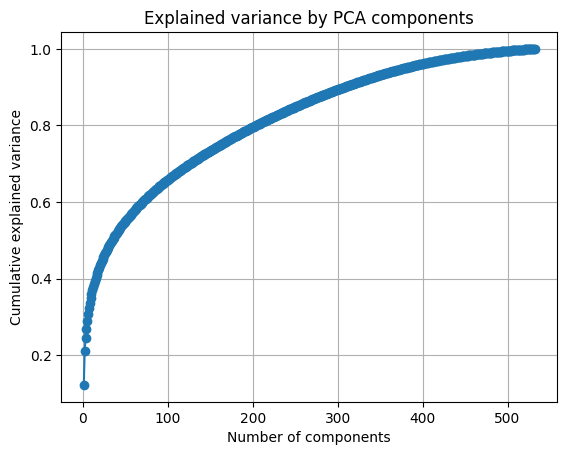

In [6]:
# Visualize explained variance
plt.figure()
plt.plot(np.arange(1, len(explained)+1), explained, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained variance by PCA components')
plt.grid()
plt.show()

In [7]:
clf = RandomForestClassifier(random_state=42)
scores_no_pca = cross_val_score(clf, X, Y, cv=5)
print(f"Accuracy without PCA: {scores_no_pca.mean():.3f}")

pcaN = PCA(n_components=n_components)
X_pcaN = pcaN.fit_transform(X)
scores_pca = cross_val_score(clf, X_pcaN,Y, cv=5)
print(f"Accuracy with PCA ({n_components} components): {scores_pca.mean():.3f}")

Accuracy without PCA: 1.000
Accuracy with PCA (379 components): 0.786


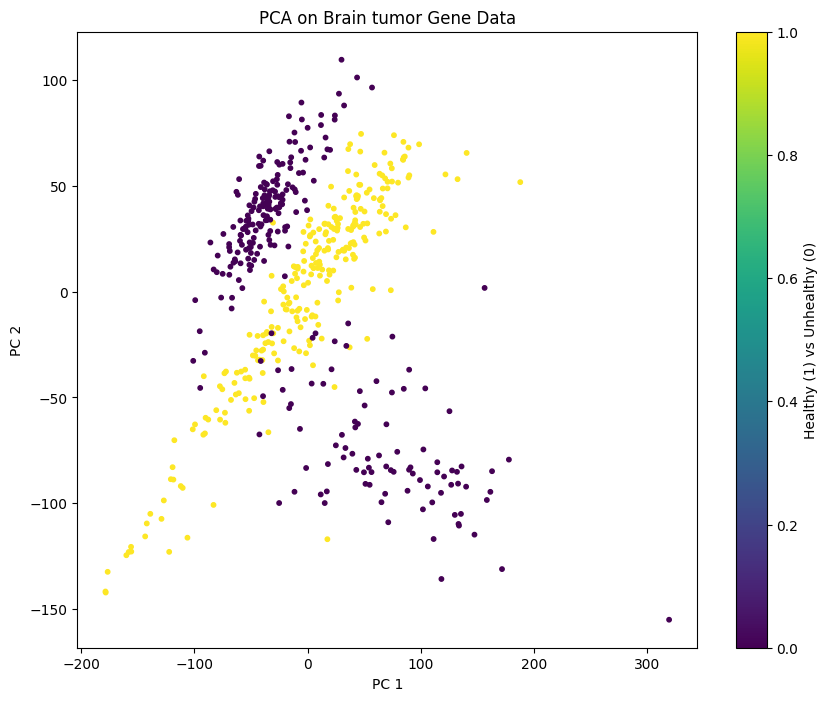

In [8]:
plt.figure(figsize=(10, 8))
plt.scatter(X_pcaN[:, 0], X_pcaN[:, 1], c=Y, cmap='viridis', s=10)
plt.title('PCA on Brain tumor Gene Data')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar(label='Healthy (1) vs Unhealthy (0)')
plt.show()

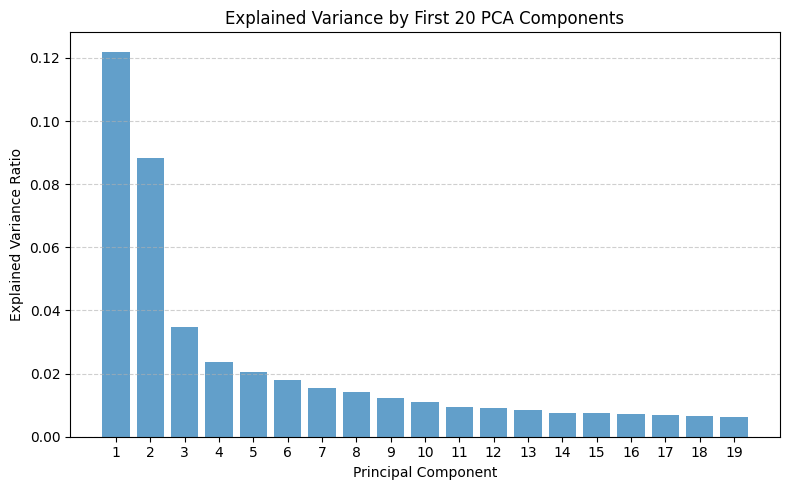

In [19]:

expl_var_n_components = 20

# Get explained variance ratio
explained_var = pcaN.explained_variance_ratio_


# Plot first 10 components
plt.figure(figsize=(8, 5))
plt.bar(range(1, expl_var_n_components), explained_var[:expl_var_n_components-1], alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title(F'Explained Variance by First {expl_var_n_components} PCA Components')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(np.arange(1, expl_var_n_components))
plt.tight_layout()
plt.show()

## T-SNE

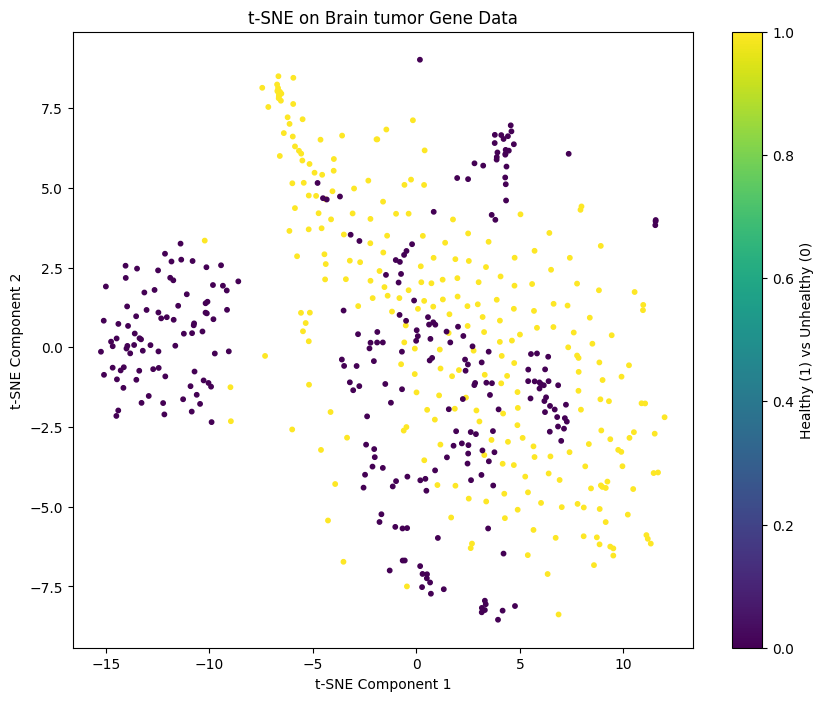

In [10]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y, cmap='viridis', s=10)
plt.title('t-SNE on Brain tumor Gene Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Healthy (1) vs Unhealthy (0)')
plt.show()

## UMAP

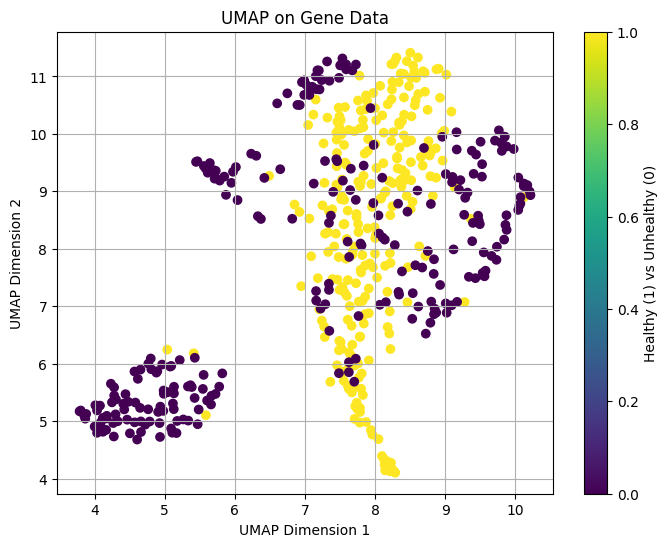

In [ ]:
reducer = UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(x=X_umap[:, 0], y=X_umap[:, 1], c=Y, cmap='viridis')
plt.title("UMAP on Brain Tumor Gene Data")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.colorbar(label='Healthy (1) vs Unhealthy (0)')
plt.grid(True)
plt.show()

In [12]:
clf = RandomForestClassifier(random_state=42)
scores_no_pca = cross_val_score(clf, X, Y, cv=5)
print(f"Accuracy without UMAP: {scores_no_pca.mean():.3f}")

umap_n_components = 200
umapN = UMAP(n_components=umap_n_components, random_state=42)
X_umapN = umapN.fit_transform(X)
scores_pca = cross_val_score(clf, X_umapN,Y, cv=5)
print(f"Accuracy with UMAP ({umap_n_components} components): {scores_pca.mean():.3f}")

Accuracy without UMAP: 1.000
Accuracy with UMAP (200 components): 0.889
